In [117]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
print('LIBRARIES IMPORTED')

LIBRARIES IMPORTED


In [118]:
#READING THE DATASET
iris=pd.read_csv('Iris.csv')
iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [119]:
print('Dimension of dataset:{}'.format(iris.shape),'\n',140*'-')
print('Number of duplicated values:{}'.format(iris.duplicated().sum()),'\n',140*'-')
print('rows contain null values:\n{}'.format(iris.isnull().sum()),'\n',140*'-')
print('Datattypes:\n{}'.format(iris.dtypes),'\n',140*'-')
print('Descriptive Analysis:\n{}'.format(iris.describe()),'\n',140*'-')
print('Correlation:\n{}'.format(iris.corr()),'\n',140*'-')
print('Count of each unique Species:\n{}'.format(iris['Species'].value_counts()))

Dimension of dataset:(150, 6) 
 --------------------------------------------------------------------------------------------------------------------------------------------
Number of duplicated values:0 
 --------------------------------------------------------------------------------------------------------------------------------------------
rows contain null values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64 
 --------------------------------------------------------------------------------------------------------------------------------------------
Datattypes:
Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object 
 --------------------------------------------------------------------------------------------------------------------------------------------
Descriptive Analysis:
               Id

In [122]:
X=iris.iloc[:,[0,1,2,3]].values
WCSS=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',
                  max_iter=300,n_init=10, random_state=0)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow method')

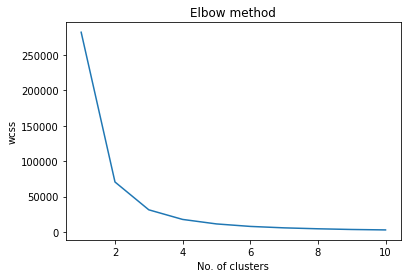

In [123]:
plt.plot(range(1,11),WCSS)
plt.xlabel("No. of clusters")
plt.ylabel("wcss")
plt.title('Elbow method')

In [126]:
kmeans=KMeans(n_clusters=3)
kmeans1=kmeans.fit(X)
predict=kmeans.predict(X)

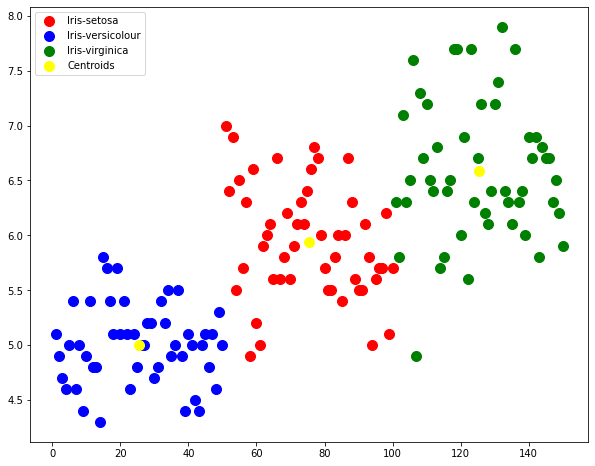

In [130]:
plt.figure(figsize=(10,8))
plt.scatter(X[predict == 0, 0], X[predict == 0, 1],s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[predict == 1, 0], X[predict == 1, 1],s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[predict == 2, 0], X[predict == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:,1],s = 100, c = 'yellow', label = 'Centroids')
plt.legend()